In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/measurements.csv')
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [3]:
data.shape

(388, 12)

In [4]:
data.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [5]:
data.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

## Data Cleaning

In [6]:
# drop columns due to missing data
data_cleaned = data.drop(columns=['refill liters','refill gas','specials'])  # 'specials' is also included in boolean columns
data_cleaned.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,"4,2",30,"21,5",13,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,E10,0,0,0


In [7]:
# drop roas with null values
data_cleaned = data_cleaned.dropna(axis=0, how='any')
data_cleaned.shape

(376, 9)

In [8]:
data_cleaned.isnull().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

In [9]:
display(data_cleaned['AC'].unique())
display(data_cleaned['rain'].unique())
display(data_cleaned['sun'].unique())

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

In [10]:
data_cleaned[['AC','rain','sun']].astype('boolean')

,AC,rain,sun
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
383,False,False,False
384,True,False,False
385,False,False,False
386,True,False,False


In [11]:
data_cleaned.dtypes

distance        object
consume         object
speed            int64
temp_inside     object
temp_outside     int64
gas_type        object
AC               int64
rain             int64
sun              int64
dtype: object

In [12]:
data_cleaned['distance'] = data_cleaned['distance'].str.replace(',', '.').astype(float)
data_cleaned['consume'] = data_cleaned['consume'].str.replace(',', '.').astype(float)
data_cleaned['temp_inside'] = data_cleaned['temp_inside'].str.replace(',', '.').astype(float)
data_cleaned.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


In [13]:
data_cleaned.dtypes

distance        float64
consume         float64
speed             int64
temp_inside     float64
temp_outside      int64
gas_type         object
AC                int64
rain              int64
sun               int64
dtype: object

In [14]:
data_cleaned['gas_type'].unique()

array(['E10', 'SP98'], dtype=object)

In [15]:
data_cleaned = pd.get_dummies(data_cleaned, columns=['gas_type'], prefix='gas_type', drop_first=True)
data_cleaned.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_SP98
0,28.0,5.0,26,21.5,12,0,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0,0


## Data Exploration

In [16]:
data_cleaned.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_SP98
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.00000,376.000000,376.000000
mean,19.797340,4.925266,41.957447,21.929521,11.340426,0.079787,0.12500,0.082447,0.582447
std,22.988878,1.040705,13.714354,1.010455,7.066999,0.271325,0.33116,0.275411,0.493813
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.00000,0.000000,0.000000
25%,11.800000,4.300000,32.000000,21.500000,6.000000,0.000000,0.00000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.00000,0.000000,1.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.00000,0.000000,1.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.00000,1.000000,1.000000


,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_SP98
distance,1.000000,-0.131379,0.565505,0.075305,0.086774,-0.027670,-0.022129,0.078627,-0.047877
consume,-0.131379,1.000000,-0.234537,-0.161991,-0.318758,0.093892,0.247699,-0.169173,-0.020928
speed,0.565505,-0.234537,1.000000,0.059725,0.019327,-0.036351,-0.002936,0.077181,-0.099495
temp_inside,0.075305,-0.161991,0.059725,1.000000,0.361308,0.297775,-0.037356,0.246120,0.010340
temp_outside,0.086774,-0.318758,0.019327,0.361308,1.000000,0.169374,-0.185731,0.349988,0.156990
AC,-0.027670,0.093892,-0.036351,0.297775,0.169374,1.000000,0.244848,0.090164,0.109996
rain,-0.022129,0.247699,-0.002936,-0.037356,-0.185731,0.244848,1.000000,-0.113298,0.059112
sun,0.078627,-0.169173,0.077181,0.246120,0.349988,0.090164,-0.113298,1.000000,0.038120
gas_type_SP98,-0.047877,-0.020928,-0.099495,0.010340,0.156990,0.109996,0.059112,0.038120,1.000000


<AxesSubplot:>

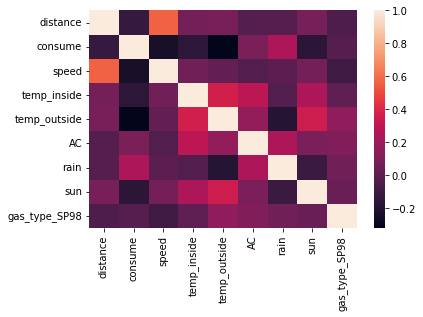

In [17]:
display(data_cleaned.corr())
sns.heatmap(data_cleaned.corr())

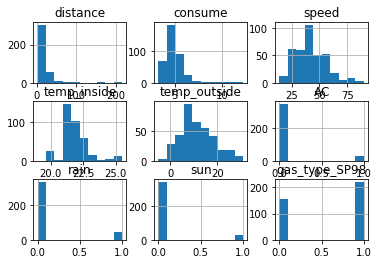

In [18]:
data_cleaned.hist()
plt.show()

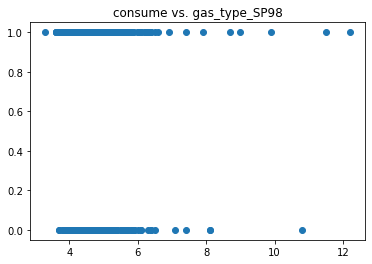

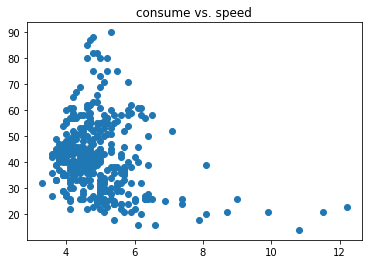

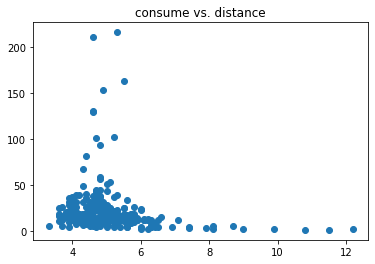

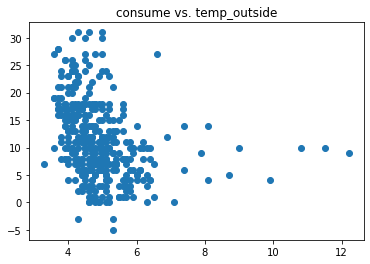

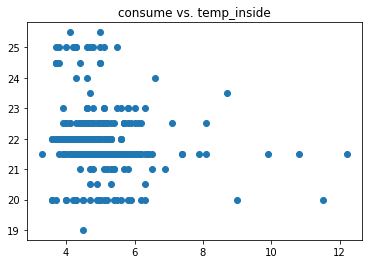

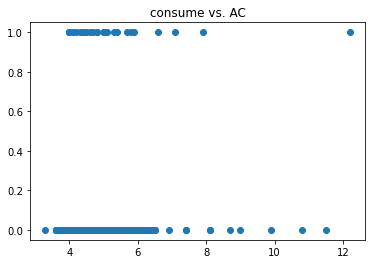

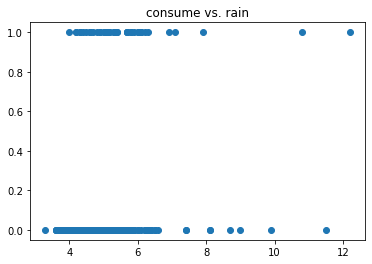

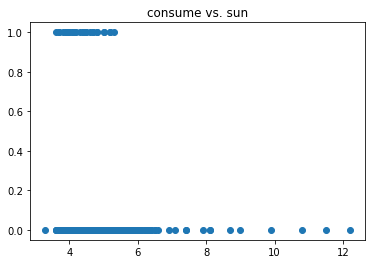

In [19]:
plt.scatter(data_cleaned['consume'],data_cleaned['gas_type_SP98'])
plt.title('consume vs. gas_type_SP98')
plt.show()
plt.scatter(data_cleaned['consume'],data_cleaned['speed'])
plt.title('consume vs. speed')
plt.show()
plt.scatter(data_cleaned['consume'],data_cleaned['distance'])
plt.title('consume vs. distance')
plt.show()
plt.scatter(data_cleaned['consume'],data_cleaned['temp_outside'])
plt.title('consume vs. temp_outside')
plt.show()
plt.scatter(data_cleaned['consume'],data_cleaned['temp_inside'])
plt.title('consume vs. temp_inside')
plt.show()
plt.scatter(data_cleaned['consume'],data_cleaned['AC'])
plt.title('consume vs. AC')
plt.show()
plt.scatter(data_cleaned['consume'],data_cleaned['rain'])
plt.title('consume vs. rain')
plt.show()
plt.scatter(data_cleaned['consume'],data_cleaned['sun'])
plt.title('consume vs. sun')
plt.show()

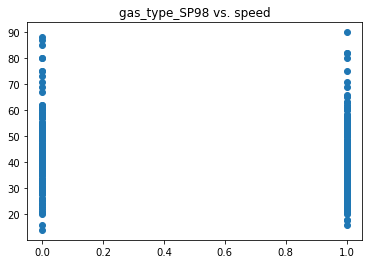

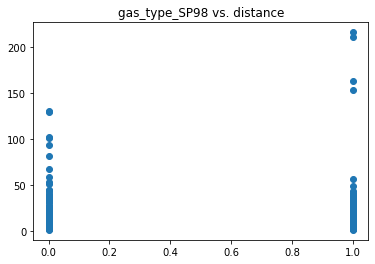

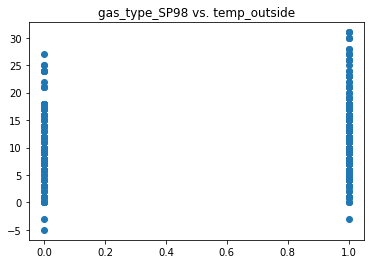

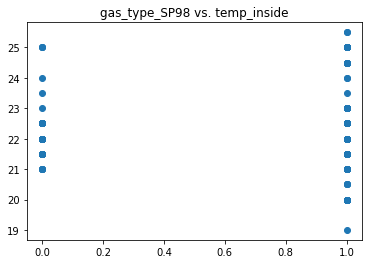

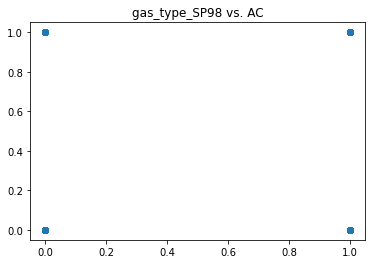

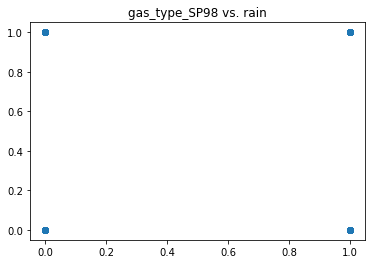

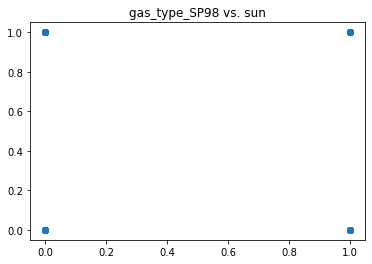

In [20]:
plt.scatter(data_cleaned['gas_type_SP98'],data_cleaned['speed'])
plt.title('gas_type_SP98 vs. speed')
plt.show()
plt.scatter(data_cleaned['gas_type_SP98'],data_cleaned['distance'])
plt.title('gas_type_SP98 vs. distance')
plt.show()
plt.scatter(data_cleaned['gas_type_SP98'],data_cleaned['temp_outside'])
plt.title('gas_type_SP98 vs. temp_outside')
plt.show()
plt.scatter(data_cleaned['gas_type_SP98'],data_cleaned['temp_inside'])
plt.title('gas_type_SP98 vs. temp_inside')
plt.show()
plt.scatter(data_cleaned['gas_type_SP98'],data_cleaned['AC'])
plt.title('gas_type_SP98 vs. AC')
plt.show()
plt.scatter(data_cleaned['gas_type_SP98'],data_cleaned['rain'])
plt.title('gas_type_SP98 vs. rain')
plt.show()
plt.scatter(data_cleaned['gas_type_SP98'],data_cleaned['sun'])
plt.title('gas_type_SP98 vs. sun')
plt.show()

## Testing

In [31]:
from sklearn import linear_model

In [32]:
model = linear_model.LinearRegression()

In [62]:
# X = data_cleaned.drop(columns=['consume','gas_type_SP98'])
X = data_cleaned[['speed']]
y = data_cleaned['consume']

In [63]:
result = model.fit(X,y)

In [64]:
result.coef_

array([-0.01779771])

In [65]:
result.intercept_

5.672012297539768

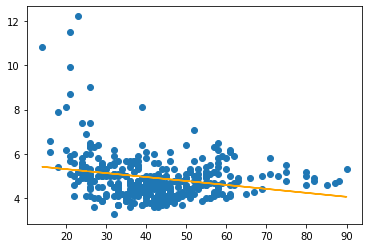

In [66]:
regression_line = result.intercept_ + result.coef_[0]*X
plt.plot(X,regression_line,c='orange')
plt.scatter(X,y)
plt.show()

In [ ]:
### Hypotheses
# H0: Consumption is not influenced by gas type.
# H1: Consumption is influenced by gas type.

In [71]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [61]:
model = linear_model.LinearRegression()

# X = np.array(data_cleaned['gas_type_SP98']).reshape(-1,1)
y = data_cleaned[['gas_type_SP98']]
y = data_cleaned['consume']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

model.fit(X,y)

model.score(X, y)
# model.score(X_test, y_test)

0.055007724203717245

In [ ]:
# H1 is not proven, H0 can not be rejected (score: 0.00043).

In [ ]:
### Hypotheses
# H0: Consumption is not influenced by speed, distance and outside temperature.
# H1: Consumption is influenced by speed, distance and outside temperature.

In [56]:
model = linear_model.LinearRegression()

X = data_cleaned[['speed','distance','temp_outside']]
y = data_cleaned['consume']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

model.fit(X,y)

model.score(X, y)

0.15471574493775908

In [60]:
model = linear_model.LinearRegression()

X = data_cleaned[['speed']]
y = data_cleaned['consume']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

model.fit(X,y)

model.score(X, y)

0.055007724203717245

In [70]:
model = linear_model.LinearRegression()

X = data_cleaned[['speed','gas_type_SP98']]
y = data_cleaned['consume']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

model.fit(X,y)

model.score(X, y)

0.05698658619928598

In [69]:
model = linear_model.LinearRegression()

X = data_cleaned[['speed','gas_type_SP98','temp_outside']]
y = data_cleaned['consume']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

model.fit(X,y)

model.score(X, y)

0.15381560467619793

In [72]:
scaler = StandardScaler()

X_standardized = scaler.fit_transform(X)

In [73]:
model = linear_model.LinearRegression()
scaler = StandardScaler()

X = data_cleaned[['speed','distance','temp_outside']]
y = data_cleaned['consume']

X_standardized = scaler.fit_transform(X)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

model.fit(X_standardized,y)

model.score(X_standardized, y)

0.15471574493775908

In [74]:
model = linear_model.LinearRegression()
scaler = StandardScaler()

X = data_cleaned[['speed','gas_type_SP98','temp_outside']]
y = data_cleaned['consume']

X_standardized = scaler.fit_transform(X)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

model.fit(X_standardized,y)

model.score(X_standardized, y)

0.15381560467619793

In [79]:
model = linear_model.LinearRegression()
scaler = StandardScaler()

X = data_cleaned[['speed','gas_type_SP98','temp_outside','distance']]
y = data_cleaned['consume']

X_standardized = scaler.fit_transform(X)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

model.fit(X_standardized,y)

model.score(X_standardized, y)

0.15475092284187375

In [82]:
model = linear_model.LinearRegression()
scaler = StandardScaler()

X = data_cleaned[['speed','gas_type_SP98','temp_outside','distance']]
y = data_cleaned['consume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

X_standardized = scaler.fit_transform(X_train)

model.fit(X_train,y_train)

model.score(X_train, y_train)

0.18578830218383058

In [83]:
model.predict(X_test)

array([5.04969834, 5.3942108 , 4.70387299, 4.54174784, 5.59311681,
       5.07957829, 5.05999741, 4.24519798, 4.2629275 , 5.62568288,
       5.60321742, 4.53347686, 4.83785862, 4.98915799, 4.79811002,
       4.72634847, 4.99755711, 4.28412223, 4.63435974, 5.75141038,
       5.522604  , 4.89923351, 5.6000383 , 4.80859584, 3.82878656,
       5.22761255, 4.62110175, 5.44768109, 5.07708492, 4.76475489,
       4.90417788, 5.09841227, 4.45423668, 5.27680216, 4.83902293,
       4.43294549, 5.77957316, 4.70015387, 5.34190929, 5.5579888 ,
       5.17613822, 4.97802562, 4.92115003, 5.13616937, 3.80560571,
       3.52303744, 5.58363338, 3.30466891, 5.13892661, 5.05634708,
       5.18337902, 4.49800889, 5.20000703, 5.41628664, 4.5724333 ,
       5.14053158, 4.49110516, 5.52169964, 4.63998386, 5.15124496,
       4.71467661, 4.78395473, 4.45066063, 5.37054335, 4.91991149,
       4.51358789, 4.97225407, 4.573107  , 5.30777637, 5.27499583,
       5.1497817 , 4.66725514, 4.66010633, 4.47799466, 4.48610

In [85]:
model.score(X_test, y_test)

-0.027346861186448468